# Data

In [1]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()

# df = get_pair_df(pair="BTCUSDT")
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
df.head(14)

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2021-11-24,57541.26,57735.00,55837.00,57138.29,39612.049640,2021-11-24 23:59:59.999
1,2021-11-25,57138.29,59398.90,57000.00,58960.36,42153.515220,2021-11-25 23:59:59.999
2,2021-11-26,58960.37,59150.00,53500.00,53726.53,65927.870660,2021-11-26 23:59:59.999
3,2021-11-27,53723.72,55280.00,53610.00,54721.03,29716.999570,2021-11-27 23:59:59.999
4,2021-11-28,54716.47,57445.05,53256.64,57274.88,36163.713700,2021-11-28 23:59:59.999
5,2021-11-29,57274.89,58865.97,56666.67,57776.25,40125.280090,2021-11-29 23:59:59.999
6,2021-11-30,57776.25,59176.99,55875.55,56950.56,49161.051940,2021-11-30 23:59:59.999
7,2021-12-01,56950.56,59053.55,56458.01,57184.07,44956.636560,2021-12-01 23:59:59.999
8,2021-12-02,57184.07,57375.47,55777.77,56480.34,37574.059760,2021-12-02 23:59:59.999
9,2021-12-03,56484.26,57600.00,51680.00,53601.05,58927.690270,2021-12-03 23:59:59.999


# MA cross 

(2, 11, 'hma')


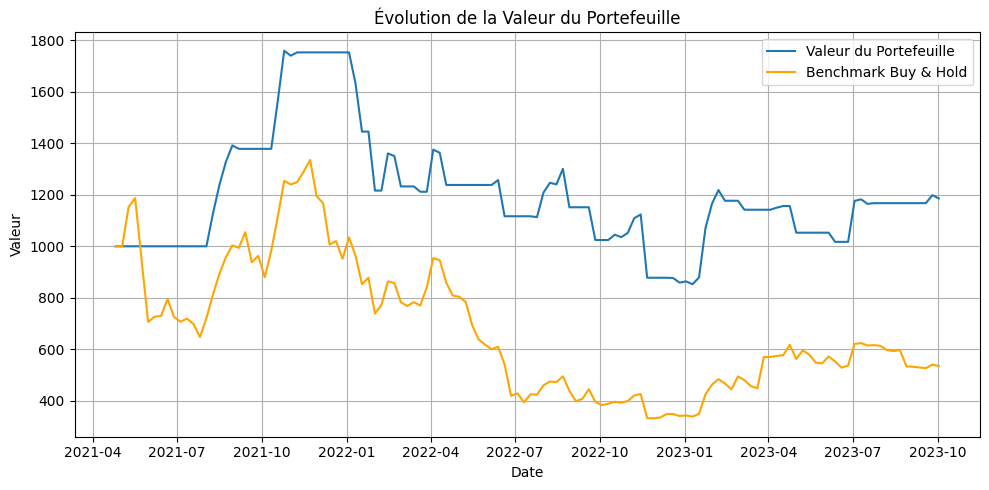

pnl: 185.83840297587335
Win Rate: 0.5
Max drawdown: -0.1754954998957173
Trade number: 18
Excess return compared to B&H: 0.9386881770409199


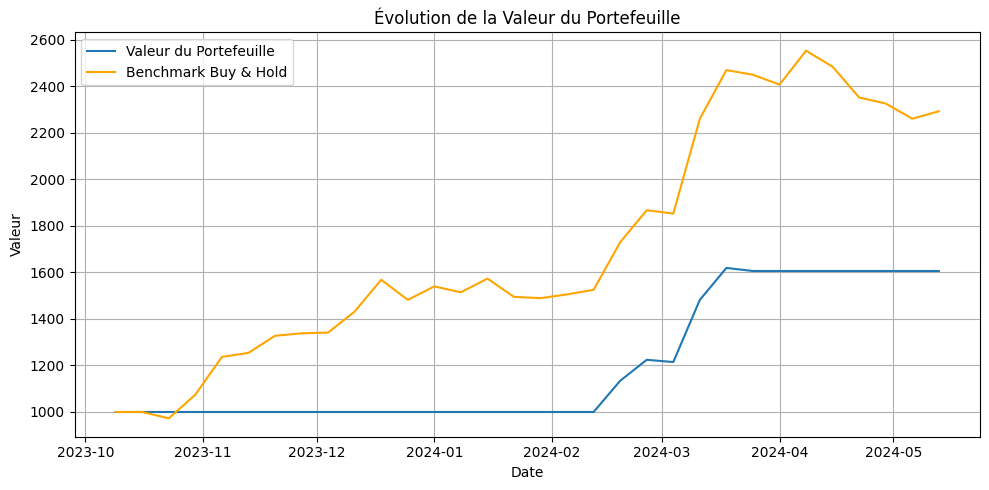

pnl: 606.1262178603233
Win Rate: 1.0
Max drawdown: 0.6061262178603232
Trade number: 1
Excess return compared to B&H: 0.06409810013992569


In [13]:
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester 

from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
df = get_pair_df(pair="BTCUSDT", limit=160, frequency="1w")
ranges = {
        "short_ma": range(1, 5),
        "long_ma": range(1, 15),
        "ma_type": ["hma"],
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, MACrossBacktester, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)



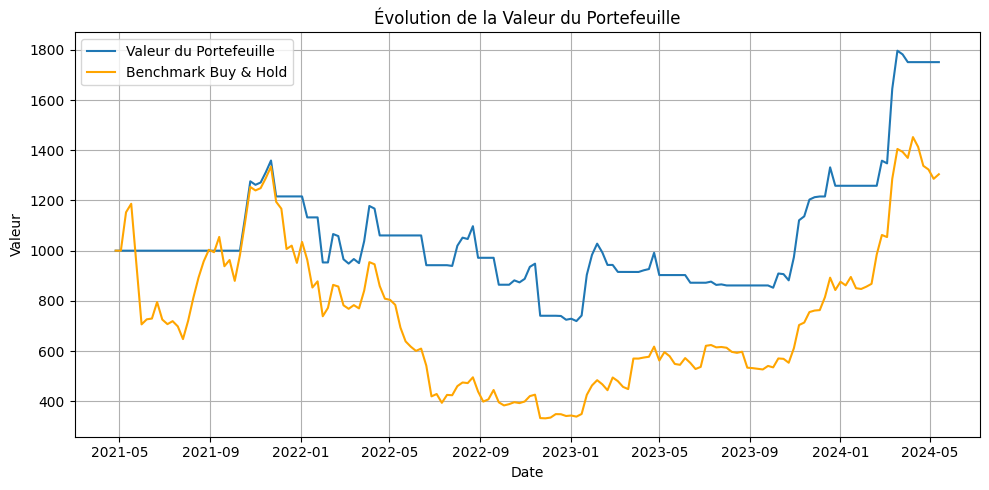

pnl: 751.4681561540567
Win Rate: 0.4375
Max drawdown: -0.1585058481609485
Trade number: 16
Excess return compared to B&H: 0.5564219252737873


In [12]:
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester
from src.mtal.dataviz import display_strategy_results 
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()
# df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
df = get_pair_df(pair="BTCUSDT", limit=160, frequency="1w")
results = MACrossBacktester(df, short_ma=2, long_ma=15, ma_type="hma").run()
display_strategy_results(df, results)

# MA above

(2, 15, 'hma')


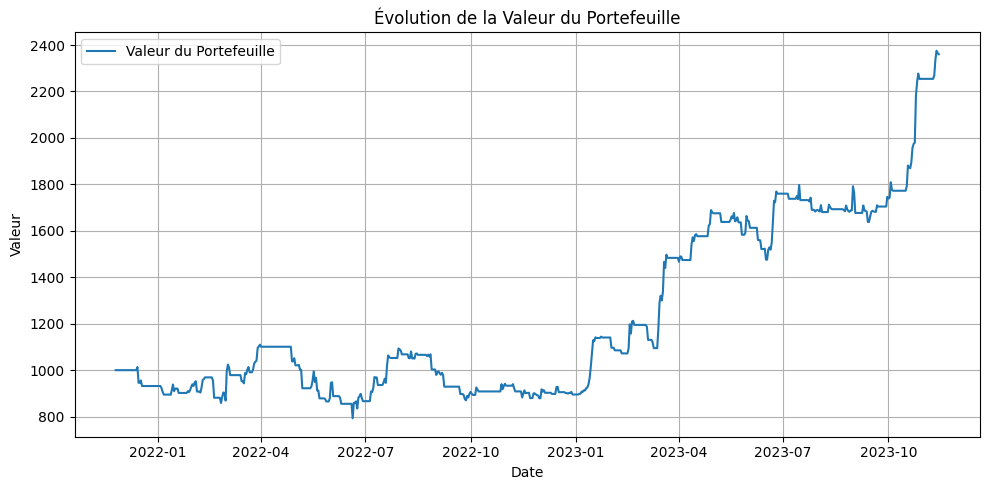

pnl: 1360.424882345293
Normalized pnl: 18.894790032573514
Win Rate: 0.4166666666666667
Max drawdown: -0.09045173786605241
Trade number: 72
Excess return compared to B&H: 22.035784882345293


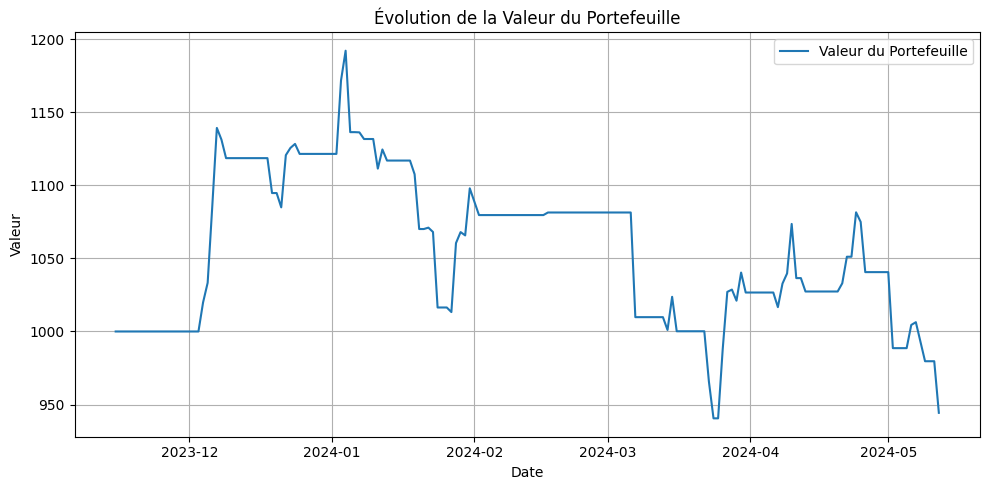

pnl: -55.68744087918685
Normalized pnl: -2.7843720439593427
Win Rate: 0.4
Max drawdown: -0.06625617932614378
Trade number: 20
Excess return compared to B&H: -25.36050744087919


In [6]:
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "short_ma": range(1, 20),
        "long_ma": range(1, 40),
        "ma_type": ["ema", "vwma", "hma"],
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, MACrossPriceAboveBacktester, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)

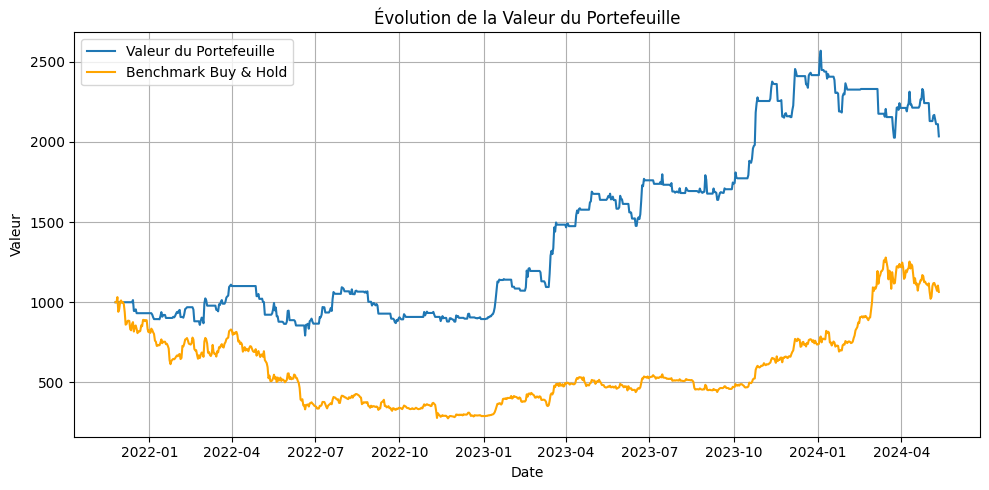

pnl: 1033.9872701383124
Normalized pnl: 10.770700730607421
Win Rate: 0.40625
Max drawdown: -0.09045173786605241
Trade number: 96
Excess return compared to B&H: 0.968688409562304


In [4]:
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester
from src.mtal.dataviz import display_strategy_results 
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
results = MACrossPriceAboveBacktester(df, short_ma=2, long_ma=15, ma_type="hma").run()
display_strategy_results(df, results)

# VZO-RSI

(14, -15, 5)


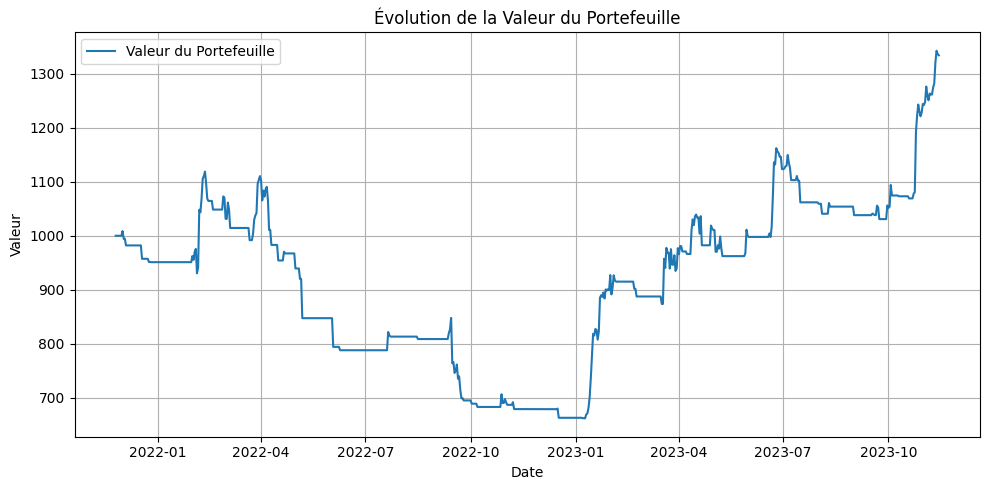

pnl: 334.39910501009126
Normalized pnl: 5.765501810518815
Win Rate: 0.27586206896551724
Max drawdown: -0.13570857078919538
Trade number: 58
Excess return compared to B&H: 21.009759105010094


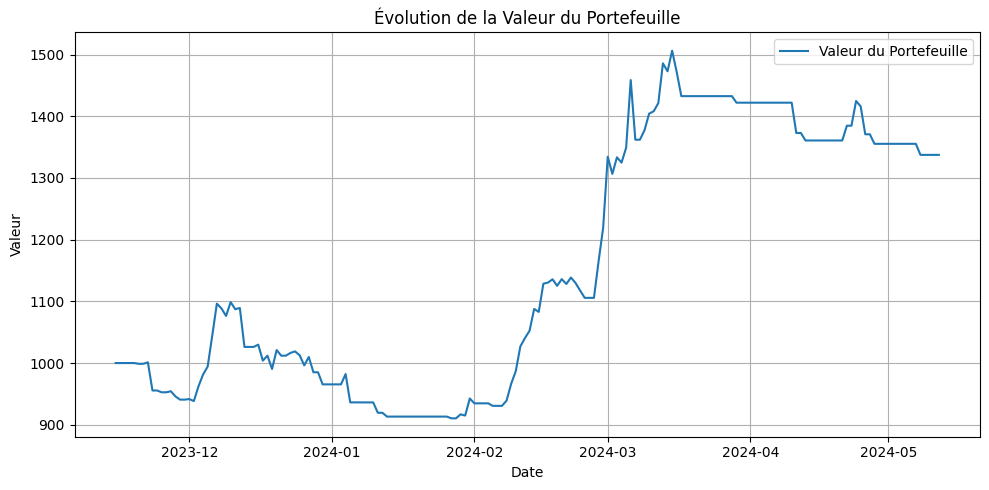

pnl: 337.43599753864464
Normalized pnl: 14.05983323077686
Win Rate: 0.25
Max drawdown: -0.04331413447480797
Trade number: 24
Excess return compared to B&H: -24.966274002461354


In [7]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.backtesting.vzo_rsi import VZO_RSI
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "span": range(13, 15),
        "grey_zone_rsi": range(-15, -10),
        "grey_zone_vzo": range(0, 10),
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, VZO_RSI, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)

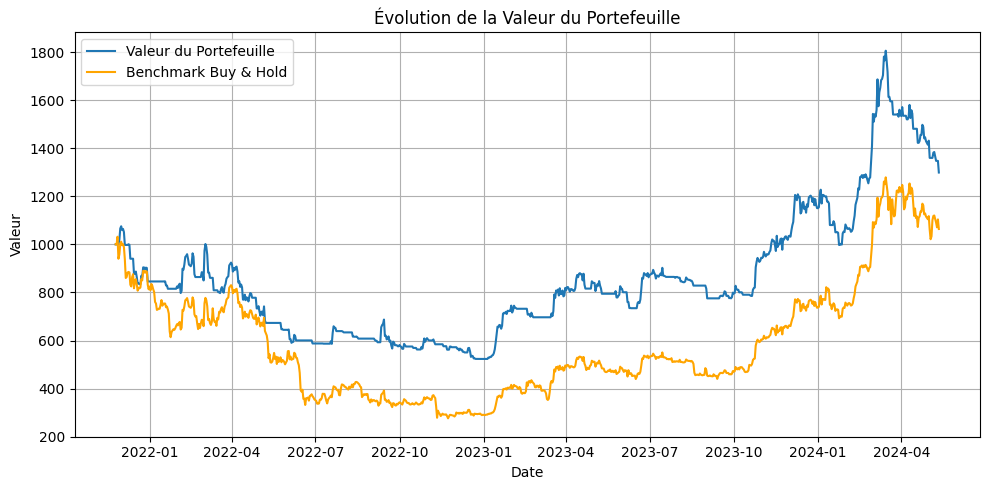

pnl: 298.9634637799727
Normalized pnl: 3.4763193462787525
Win Rate: 0.20930232558139536
Max drawdown: -0.08297811183995184
Trade number: 86
Excess return compared to B&H: 0.2330175038725897


In [2]:
from src.mtal.backtesting.vzo_rsi import VZO_RSI
from src.mtal.dataviz import display_strategy_results 
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
results = VZO_RSI(df, span=14, grey_zone_rsi=-15, grey_zone_vzo=-5).run()
display_strategy_results(df, results)

# VZO-RSI grey

720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720


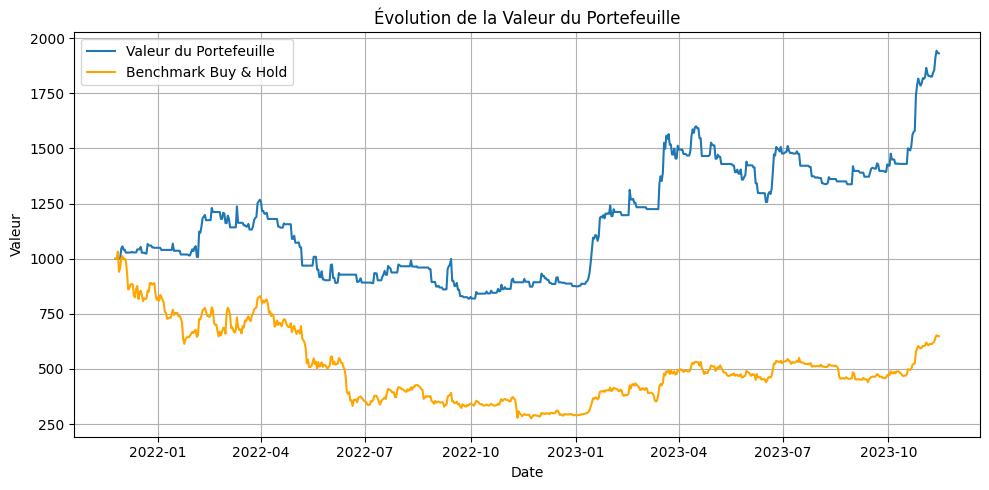

pnl: 930.8297371126821
Normalized pnl: 6.464095396615848
Win Rate: 0.3402777777777778
Max drawdown: -0.07903829680020154
Trade number: 144
Excess return compared to B&H: 21.606189737112683


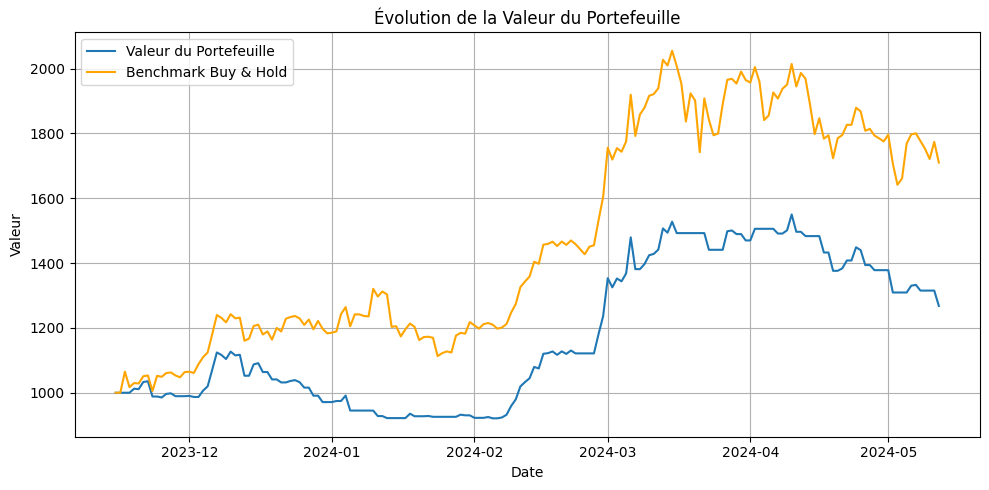

pnl: 267.7981353082207
Normalized pnl: 7.237787440762721
Win Rate: 0.3783783783783784
Max drawdown: -0.05001096044843892
Trade number: 37
Excess return compared to B&H: -25.313781864691773


In [3]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.backtesting.vzo_rsi import VZO_RSI_let_grey
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "span": range(1, 20),
        "grey_zone_rsi": range(-20, 15),
        "grey_zone_vzo": range(-20, 15),
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, VZO_RSI_let_grey, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)

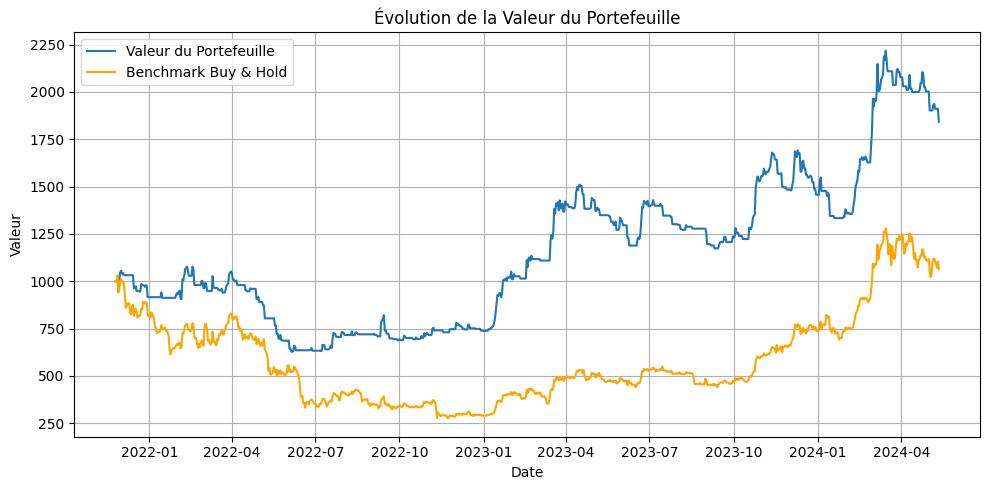

pnl: 841.943342828326
Normalized pnl: 5.929178470622014
Win Rate: 0.33098591549295775
Max drawdown: -0.08877992904949492
Trade number: 142
Excess return compared to B&H: 0.7758801300550097


In [1]:
from src.mtal.backtesting.vzo_rsi import VZO_RSI_let_grey
from src.mtal.dataviz import display_strategy_results 
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
results = VZO_RSI_let_grey(df, span=5, grey_zone_rsi=-12, grey_zone_vzo=-14).run()
display_strategy_results(df, results)

# Test on stocks

In [9]:
stocks[:15]

0     ALMIL.PA
1     AL2SI.PA
2     ALAST.PA
3        AB.PA
4      ABCA.PA
5      ABEO.PA
6      ABNX.PA
7      ABVX.PA
8      ABLD.PA
9       ABO.BR
10     ACAN.PA
11       AC.PA
12    ALALO.PA
13      EOS.PA
14    ALATI.PA
Name: ticker_eodhd, dtype: object

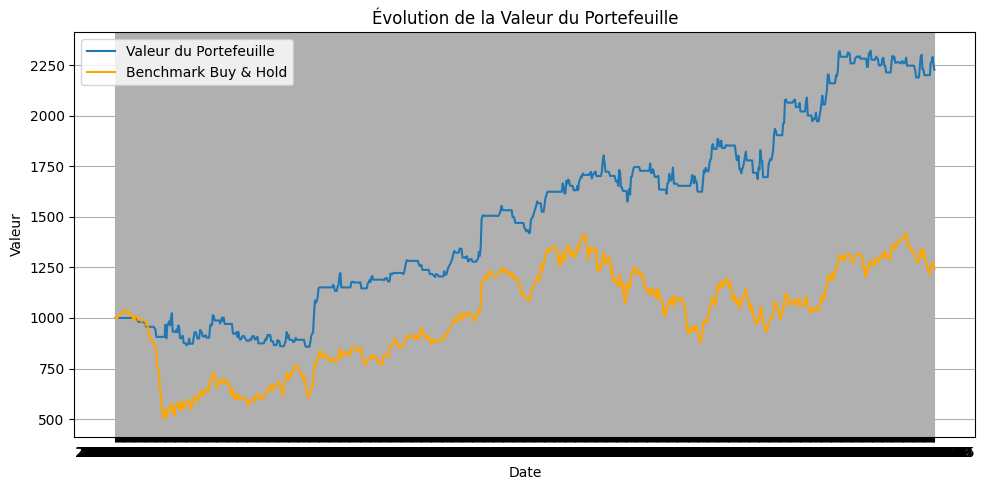

pnl: 1227.708629168898
Win Rate: 0.4117647058823529
Max drawdown: -0.05204648812531587
Trade number: 102
Excess return compared to B&H: 1.0472738465602023


In [9]:
from src.mtal.data_collect import (
    get_stock_data,
    get_ticker_names,
)
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester 
from src.mtal.dataviz import display_strategy_results 

stocks = get_ticker_names()
stock_df = get_stock_data(stocks[50], period="d")
stock_df = stock_df[:900]
# results = VZO_RSI_let_grey(stock_df, span=5, grey_zone_rsi=-12, grey_zone_vzo=-14).run()
results = MACrossBacktester(stock_df, short_ma=2, long_ma=15, ma_type="hma").run()
display_strategy_results(stock_df, results)

In [10]:
stocks[50]

'ATE.PA'